# 뉴스 요약봇 만들기
---
## 텍스트 요약(Text Summarization)
긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Summary) 문장들로 변환하는 것  
- 예> 큰 텍스트인 뉴스 기사로 작은 텍스트인 뉴스 제목을 만들어내는 것
- 요약 전후에 정보 손실 발생이 최소화되어야 한다 :  정보를 압축하는 과정

### 추출적 요약(Extractive Summarization)
원문에서 문장들을 추출해서 요약하는 방식  
결과로 나온 문장들 간의 호응이 자연스럽지 않을 수 있다  
문장 분류(Text Classification) 문제  

**텍스트 랭크(TextRank) 알고리즘**
- 가장 잘 대표하는 단어들로 이루어진 핵심문장을 효과적으로 찾아내는 알고리즘
- 10개의 문장으로 구성된 텍스트가 있다면, 그중 핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식  
- 전통적인 머신러닝 방식 (ex> 네이버 뉴스 요약봇)
- 요약문에 사용된 문장 3개가 원문에 그대로 있다

### 추상적 요약(Abstractive Summarization)
원문으로부터 내용이 요약된 새로운 문장을 생성해내는 것  
결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다  
자연어 처리 분야 **자연어 생성(Natural Language Generation, NLG)** 영역

**구글 - 뉴스 기사 내용으로부터 자동으로 뉴스 제목을 뽑아내는 텍스트 요약 모델**
기계학습 기반 텍스트 요약을 위해 시도한 몇 가지 접근법
1. 텍스트마이닝 분야의 '역문서빈도(IDF)같은' 지표를 활용해 문서 안에서 중요해 보이는 부분을 추출하고 그걸 요약문에 담는 방식
2. 사람이 하는 것처럼 본문 일부를 발췌하도록 강제하지 않고 내용을 고쳐 쓸 수 있도록 허용하는 방식 : 추상적 요약
- 추상적 요약이 더 나은 방식 - 비슷한 분량의 단어에 더 많은 정보를 보존하도록, 원문에 없는 단어를 썼다
3. 딥러닝 기법, **'시퀀스-투-시퀀스 러닝'(seq2seq) 방식**을 적용 
- 뉴스 텍스트를 읽혔을 때 적절한 헤드라인을 쓰게 만드는 식으로 이 모델을 훈련시킬 수 있다는 점을 깨달았다.

### seq2seq 모델
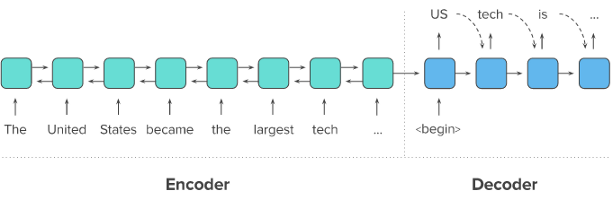  
두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해 내는 자연어 생성 모델  
1. 첫 번째 RNN (인코더) : 원문을 하나의 고정된 **컨텍스트 벡터(context vector)**로 변환
- 컨텍스트 벡터(context vector) : 문맥 정보를 가지고 있는 벡터
2. 두 번째 RNN (디코더) : 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성

인코더/디코더 - LSTM 사용
- 다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다 (<-> 바닐라 RNN)
- 컨텍스트 벡터도 h(hidden state)와 c(cell state) 값 모두 존재해야 한다.
시작토큰(SOS) 입력시 종료 토큰(EOS)을 예측하는 시점까지 각 시점마다 단어 생성
- 전처리 필요 : 훈련 데이터의 예측 대상 시쿼스의 앞/뒤에 시작토큰/종료토큰을 넣어주어야 한다.

**어텐션 메커니즘(Attention Mechanism)**
- 인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것
- 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산
- 디코더의 현재 스텝이 어디냐에 따라 컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 계속 달라진다


### 요약
1. **seq2seq**를 사용
2. RNN 계열 중 **LSTM을 사용** - hidden state뿐만 아니라 cell state도 사용해야 한다
3. 디코더의 예측 시퀀스에는 시작 토큰 SOS와 예측 토큰 EOS를 시퀀스의 앞, 뒤로 붙입니다.
4. seq2seq를 구동시키면 디코더는 시작 토큰을 입력받아 예측을 시작합니다.
5. seq2seq 기본 모델과 달리, **어텐션 메커니즘**을 이용해 인코더의 **hidden state의 중요도를 취합**한 컨텍스트 벡터를 디코더 스텝별로 계산합니다.
6. 계산된 컨텍스트 벡터를 이용해서 디코더는 다음 등장할 단어를 예측합니다.
---
## 데이터 준비하기
---
### NLTK(Natural Language Toolkit)의 불용어(stopwords) 사용
조사, 접미사와 같이 문장에는 자주 등장하지만, 의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리되어 있다  

In [1]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/news_summarization/data/Reviews.csv", nrows=100000)
print('전체 샘플수 :', (len(data)))
data.head()

전체 샘플수 : 100000


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# Summary 열과 Text 열만 훈련에 사용 >> data로 부터 두 열만 추출
data = data[['Summary', 'Text']]
data.head()

#랜덤한 15개 샘플 출력
data.sample(15)

,Summary,Text
19290,slow to ship and not as fresh as expected,"Ordered this item as a birthday gift and ""thou..."
56676,Spicy Thai,"When I saw the Spicy Thai chips, I knew i had ..."
48494,Good if you like banana nut bread!,I received this product complimentary from Inf...
2149,what an awesome idea!,this makes feeding on the go so easy! my one-y...
15303,"Delicious , Nice soft texture",I really was expecting some nearly straw-like ...
19053,Perfect!,This was perfect for my purposes! I made a per...
88812,our dog won't eat this! loves the turkey Sojo...,perhaps it's not fair to give this Sojos Beef ...
19732,Does NOT promote healthy growth and development,I was hoping that the new recipe would include...
10809,"What Can I Say? It's Good, Creamy Peanut Butter","This is just like the smooth, reduced fat Skip..."
28682,Tastes good.,I like this drink. It is a little bit sweet fo...


---
## 데이터 전처리
---
### 중복 샘플과 NULL 값 존재하는 샘플 제거

In [4]:
## 중복 샘플 유무 확인
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [5]:
# Text 자체가 중복이 된 경우는 중복 샘플이므로 제거
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88426


In [6]:
# 데이터프레임에 Null 값이 있는지 확인
print(data.isnull().sum())

Summary    1
Text       0
dtype: int64


In [7]:
# 데이터프레임에 Null 값 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88425


### 텍스트 정규화와 불용어 제거
**데이터 정규화(text normalization)**  
기계 학습 전에 미리 같은 표현을 통일시켜 연산량을 줄이는 방법

In [8]:
# 정규화 사전
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


**불용어(stopwords)**  
텍스트에는 자주 등장하지만 자연어 처리를 할 때 실질적으로 별 도움이 되지 않는 단어

In [9]:
# NLTK에서 제공하는 불용어 리스트 : stopwords
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [12]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    # 텍스트 소문자화
    sentence = sentence.lower() 
    
    # html 태그 제거
    sentence = BeautifulSoup(sentence, "lxml").text 
    
    # 특수 문자 제거 : 정규표현식    
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

# 데이터 전처리 함수 테스트
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'  
temp_summary = 'Great way to start (or finish) the day!!!'  

print("text: ", preprocess_sentence(temp_text))
print("summary:", preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

text:  everything bought great infact ordered twice third ordered wasfor mother father
summary: great way to start the day


In [16]:
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
clean_text = data['Text'].apply(lambda x : preprocess_sentence(x))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts p...
2    confection around centuries light pillowy citr...
3    looking secret ingredient robitussin believe f...
4    great taffy great price wide assortment yummy ...
Name: Text, dtype: object


In [18]:
# 전체 Summary 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
clean_summary = data['Summary'].apply(lambda x : preprocess_sentence(x, False))

print("Summary 전처리 후 결과: ", clean_summary[:5])

Summary 전처리 후 결과:  0    good quality dog food
1        not as advertised
2      delight says it all
3           cough medicine
4              great taffy
Name: Summary, dtype: object


In [21]:
# 전처리 데이터 적용
data['Text'] = clean_text
data['Summary'] = clean_summary

# 전처리 이후 빈 샘플 확인 및 제거

# 빈 값을 Null 값으로 변환 
data.replace('', np.nan, inplace=True)
# NULL 값 확인
data.isnull().sum()

# 빈 샘플 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


In [29]:
# clean 데이터 임시 저장
# clean_data_path = os.getenv("HOME")+"/aiffel/news_summarization/data/ex10_clean.csv"
# data.to_csv(clean_data_path, mode='w')

In [30]:
# clean data load
# clean_data = data = pd.read_csv(clean_data_path, nrows=100000)

### 샘플의 최대 길이 정하기
- 최소, 최대, 평균 길이 확인
- 길이 분포 시각화  
- Text 및 Summery 최대 길이를 정하고 해당 길이 이하 데이터 제외 처리

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.792428272310566
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.010729443721352


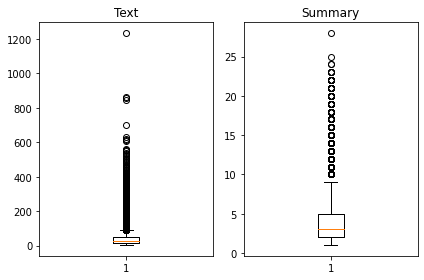

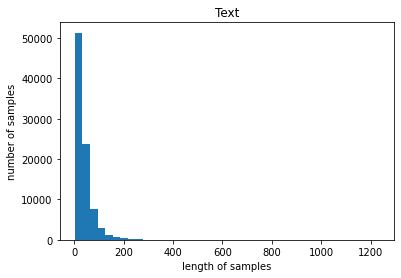

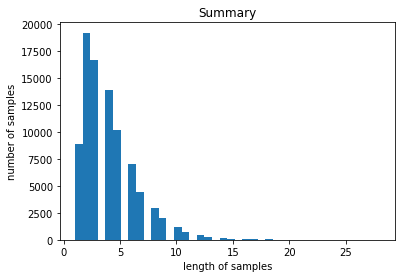

In [33]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('Summary')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

위에서부터 차례대로 
- 실제 텍스트와 요약의 길이 분포 그래프
- 실제 텍스트 샘플 길이별 개수 그래프
- 요약본 샘플 길이별 개수 그래프

Text : 최소/최대 차이가 굉장히 크지만, 시각화된 그래프로 봤을 때는 대체적으로는 100 내외의 길이 확인 가능  
- 최소 길이가 2
- 최대 길이가 1,235
- 평균 길이는 38

Summary : Text에 비해 상대적으로 길이가 짧고, 그래프 상 대체적으로 10이하의 길이  
- 최소 길이가 1
- 최대 길이가 28
- 평균 길이가 4

이로부터 Text의 최대 길이와 Summary의 적절한 최대 길이를 임의로 정하기

In [34]:
text_max_len = 50
summary_max_len = 8

# 훈련 데이터와 샘플의 길이를 입력하면, 데이터의 몇 %가 해당하는지 계산하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7745119121724859
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9424593967517402


In [35]:
# data 데이터프레임을 임의로 정의한 text_max_len과 summary_max_len의 길이보다 큰 샘플을 제외 처리
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len) &
         data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]

print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65818


### 시작 토큰과 종료 토큰 추가하기
- 시작토큰: 'sostoken'
- 종료토큰: 'eostoken'

In [37]:
# Summary 데이터에는 시작 토큰과 종료 토큰을 추가

# decoder_input 컬럼 추가 - Summary에 시작 토큰 추가 문장
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
# decoder_target 컬럼 추가 - Summary에 종료 토큰 추가 문장
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

/tmp/ipykernel_57/4263491036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
/tmp/ipykernel_57/4263491036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')


,Unnamed: 0,Summary,Text,decoder_input,decoder_target
0,0,good quality dog food,bought several vitality canned dog food produc...,sostoken good quality dog food,good quality dog food eostoken
1,1,not as advertised,product arrived labeled jumbo salted peanuts p...,sostoken not as advertised,not as advertised eostoken
2,2,delight says it all,confection around centuries light pillowy citr...,sostoken delight says it all,delight says it all eostoken
3,3,cough medicine,looking secret ingredient robitussin believe f...,sostoken cough medicine,cough medicine eostoken
4,4,great taffy,great taffy great price wide assortment yummy ...,sostoken great taffy,great taffy eostoken


### 훈련 데이터 / 테스트 데이터 분리
- 분리코드 직접 구현하기

In [38]:
# 인코더의 입력, 디코더의 입력과 레이블 저장
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

# encoder_input과 크기와 형태가 같고, 순서가 섞인 정수 시퀀스를 생성
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[40709 40238 40191 ... 36530 65637 41129]


In [41]:
# 순서가 섞인 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [60]:
#8:2의 비율로 훈련 데이터와 테스트 데이터로 분리
n_of_val = int(len(encoder_input)*0.2) # 테스트 데이터 갯수

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52655
훈련 레이블의 개수 : 52655
테스트 데이터의 개수 : 13163
테스트 레이블의 개수 : 13163


### 정수 인코딩
기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터의 단어들을 모두 정수로 변환  
**단어 집합(vocabulary)** 만들기
- 각 단어에 고유한 정수를 매핑하는 작업

In [61]:
# Keras의 토크나이저를 사용
src_tokenizer = Tokenizer()

# 입력된 데이터로부터 단어 집합 생성 >> src_tokenizer.word_index에 저장됨
src_tokenizer.fit_on_texts(encoder_input_train) 

#### 빈도수가 낮은 단어들은 훈련 데이터에서 제외 처리  
- 등장 빈도수(threshold)가 7회 미만인 단어들의 비중 확인

In [62]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 32013
등장 빈도가 6번 이하인 희귀 단어의 수: 23769
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8244
단어 집합에서 희귀 단어의 비율: 74.24796176553275
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.3868164287846323


- 등장 빈도가 6회 이하인 단어들은 정수 인코딩 과정에서 빼고, 훈련 데이터에서 제거  
- 단어 집합의 크기를 8,000으로 제한(num_words)하여 토크나이저를 정의
- 8,000이 넘는 숫자들은 정수 인코딩 후에는 데이터에 존재하지 않는다

In [63]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[406, 92, 8, 577, 349, 30, 57, 146, 906, 6195, 255, 232, 3238, 23, 926, 323, 1137, 80, 7, 1753, 122, 8, 2713, 380, 107, 725, 371, 85, 795], [91, 12, 1, 471, 1627, 1947, 213, 201, 1607, 105, 285, 1243, 44, 1097, 304, 3, 132, 99, 1244, 597], [723, 125, 3529, 1010, 77, 728, 1617, 1708, 96, 3, 1786, 3530, 2539, 1258, 4, 2, 96, 685, 111, 6768, 229, 29, 55, 94, 598, 125, 51, 72, 181, 682, 1180, 408, 97, 6769, 37, 31, 705, 57]]


#### Summary 데이터에 대해서도 동일한 작업을 수행

In [64]:

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10533
등장 빈도가 5번 이하인 희귀 단어의 수: 8160
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2373
단어 집합에서 희귀 단어의 비율: 77.47080603816576
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.90470534569272


In [65]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 163, 4, 74, 23, 144], [1], [1, 325, 836, 1284], [1, 85, 22, 191, 10, 113], [1, 50, 31, 19, 449]]
target
decoder  [[163, 4, 74, 23, 144, 2], [2], [325, 836, 1284, 2], [85, 22, 191, 10, 113, 2], [50, 31, 19, 449, 2]]


####  패딩 하기로 넘어가기 전에 한 가지 점검
빈도수가 낮은 단어만으로 구성되었던 샘플들이 이제 빈(empty) 샘플이 되었을 가능성 
- Summary의 경우에는 이 현상이 굉장히 두드러졌을 가능성이 높다
- 시작/종료 토큰은 모든 샘플에서 등장하므로 빈도수가 샘플 수와 동일하게 매우 높아 단어 집합 제한에도 삭제되지 않음
- 길이 0이 된 decoder_input에는 sostoken, decoder_target에는 eostoken만 남아  길이가 0이 된 요약문의 실제 길이는 1

훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 drop_train과 drop_test에 라는 변수에 저장하기

In [66]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1275
삭제할 테스트 데이터의 개수 : 330
훈련 데이터의 개수 : 51380
훈련 레이블의 개수 : 51380
테스트 데이터의 개수 : 12833
테스트 레이블의 개수 : 12833


### 패딩하기
서로 다른 길이의 샘플들을 병렬 처리하기 위해 같은 길이로 맞춰주는 작업  
- 아까 정해두었던 최대 길이로 패딩
- 최대 길이보다 짧은 데이터들은 뒤의 공간에(post) 숫자 0을 넣어 최대 길이로 길이를 맞춘다

In [67]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

---
## 모델 설계하기
---
### 함수형 API를 이용해서 인코더를 설계 : LSTM

In [68]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 인코더 설계 시작
embedding_dim = 128 # 임베딩 벡터의 차원
hidden_size = 256 # LSTM 수용력(capacity) 설정

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
# encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3

encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)

**embedding_dim** : 임베딩 벡터 차원  
**hidden_size** : LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터
- LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수
- 무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니다

인코더의 LSTM은 총 3개의 층으로 구성
- hidden state의 크기를 늘리는 것이 LSTM 층 1개의 용량을 늘린다면
- 3개의 층을 사용하는 것은 모델의 용량을 늘린다고 볼 수 있다

LSTM은 dropout 뿐 아니라 recurrent dropout까지 사용 가능   

**일반적인 dropout**  
- 레이어의 weight를 랜덤으로 생략하여 모델의 과적합(overfitting)을 해결해주는 방법  

**recurrent dropout**  
- dropout을 레이어가 아닌 time step마다 해주는 방식
- ime step의 입력을 랜덤으로 생략해 준다
- 일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다  

**Variational Dropout**  
dropout과 recurrent dropout을 모두 사용한 것  
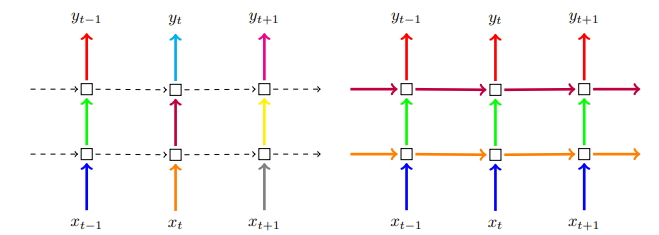

---
### 디코더 설계

In [69]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
# decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

디코더의 임베딩 층과 LSTM을 설계하는 것은 인코더와 거의 동일하다  
- LSTM의 입력을 정의할 때 initial_state의 인자값 : 인코더의 hidden state와 cell state의 값

#### 디코더의 출력층 설계

In [70]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

디코더의 출력층 - 다중 클래스 분류 문제를 풀어야 한다
- Summary의 단어장인 tar_vocab의 수많은 선택지 중 하나의 단어를 선택
- Dense의 인자 : tar_vocab
- 활성화 함수 : 소프트맥스 함수 사용

#### 지금까지 기본적인 seq2seq 설계
- 인코더의 hidden state와 cell state를 디코더의 초기 state로 사용

디코더의 출력층을 설계를 살짝 바꿔서 성능을 높일 수 있는 방법 >>> 어텐션 메커니즘

---
### 어텐션 메커니즘
TensorFlow에 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하기  
- 어텐션 함수 : Bahdanau 스타일의 어텐션

In [71]:
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

---
## 모델 훈련하기
---


In [72]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 52s 156ms/step - loss: 2.7093 - val_loss: 2.4023
Epoch 2/50
201/201 [==============================] - 29s 146ms/step - loss: 2.3612 - val_loss: 2.2898
Epoch 3/50
201/201 [==============================] - 29s 147ms/step - loss: 2.2256 - val_loss: 2.1516
Epoch 4/50
201/201 [==============================] - 30s 148ms/step - loss: 2.1094 - val_loss: 2.0619
Epoch 5/50
201/201 [==============================] - 30s 147ms/step - loss: 2.0210 - val_loss: 2.0136
Epoch 6/50
201/201 [==============================] - 30s 147ms/step - loss: 1.9566 - val_loss: 1.9641
Epoch 7/50
201/201 [==============================] - 30s 148ms/step - loss: 1.9043 - val_loss: 1.9398
Epoch 8/50
201/201 [==============================] - 30s 147ms/step - loss: 1.8603 - val_loss: 1.9235
Epoch 9/50
201/201 [==============================] - 30s 148ms/step - loss: 1.8209 - val_loss: 1.9024
Epoch 10/50
201/201 [==============================] - 30s 147ms/step - l

조기종료(EarlyStopping) 설정: 특정 조건 충족 시 훈련 종료  
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)  
- monitor : val_loss (검증 데이터 손실이 감소하지 않고 증가하는 현상 관찰)
- patience : 2 (관찰 조건을 2회 발견 시 종료)

조기 종료 설정시 훈련이 종료되었을 때 성능이 최고인 상황이 아닐 수 있다  

#### 훈련 데이터 손실과 검증 데이터 손실의 감소 과정 시각화

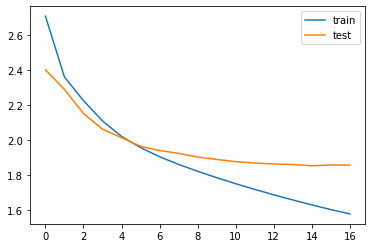

In [73]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

---
## 인퍼런스 모델  구현
---
정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원을 위해 단어 사전 준비

In [75]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

**seq2seq는 훈련할 때와 실제 동작할 때(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행해야 한다**  

훈련 단계  
- 디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교 가능
- 인코더와 디코더를 엮은 통짜 모델 하나만 준비

정답 문장이 없는 인퍼런스 단계  
- 만들어야 할 문장의 길이 만큼 디코더가 반복 구조로 동작해야 한다
- 인퍼런스를 위한 별도 모델 설계 필요
- 인코더 모델과 디코더 모델을 분리해서 설계

In [77]:
#-----------------------------------------
# 인코더 설계
#-----------------------------------------
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#-----------------------------------------
# 어텐션 메커니즘을 사용하는 출력층 설계
#-----------------------------------------
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])


In [78]:
#------------------------------------------------
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수
#------------------------------------------------
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

---
## 모델 테스트
---
정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인  
주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수 구현  
- Text의 정수 시퀀스에서는 패딩을 위해 사용되는 숫자 0을 제외
- Summary의 정수 시퀀스에서는 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외

### 요약문의 정수 시퀀스를 텍스트로 변환하는 seq2summary 함수

In [79]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [80]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : love rice never comes sticky purchased item local grocery store expensive 
실제 요약 : great rice 
예측 요약 :  great rice


원문 : beans roasted dominant flavor price great coffee 
실제 요약 : burnt and flavorless 
예측 요약 :  good stuff


원문 : find really good economical cooking giving extremely concentrated lemon lime orange flavour drop two use convenience otherwise lips small bottles deliver much oil prior idea small quantity teaspoon 
실제 요약 : citrus combo 
예측 요약 :  great product


원문 : buy dogs love however received charged staple house children 
실제 요약 : still have not received 
예측 요약 :  dogs love them


원문 : much smaller expected receive st day even requested priority delivery willing pay faster service response seller asked shipment could rushed 
실제 요약 : day 
예측 요약 :  not what expected


원문 : roasted beans full city next batch full city french oil batches coffee tasted flat bitter aroma roasted colombia mexico thing beans must low quality certainly ordering 
실제 요약 : low quality coffe 
예측 요

많은 결과가 출력이 되는데, 기존의 요약과는 다른 요약을 출력하면서도 원문의 내용을 담고 있는 의미 있는 요약들이 보이네요.    
심지어 일부 요약의 경우에는 원문에 없던 단어를 사용해서 요약을 하기도 하고 있어요.     
워드 임베딩과 RNN의 콜라보로 이뤄낸 신기한 성과네요!  
물론 슬프게도 그다지 좋지 않은 요약의 예도 꽤나 보이기도 하네요.  

**성능을 개선 방안*  
- seq2seq와 어텐션의 자체의 조합을 좀 더 좋게 수정하는 방법
- 빔 서치(beam search)
- 사전 훈련된 워드 임베딩(pre-trained word embedding)
- 인코더 - 디코더 자체의 구조를 새로이 변경한 하는 트랜스포머(Transformer)

---
## 추출적 요약 해보기
---
**패키지 Summa**
추출적 요약을 위한 모듈인 summarize를 제공  

#### 영화 매트릭스 시놉시스를 요약하기
- summarize 사용법을 익혀볼까요?

### 패키지 설치
```
$ pip list | grep summa
```
### 데이터 다운로드  

In [82]:
import requests
from summa.summarizer import summarize
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text
print(text[:1500])

The screen is filled with green, cascading code which gives way to the title, The Matrix.

A phone rings and text appears on the screen: "Call trans opt: received. 2-19-98 13:24:18 REC: Log>" As a conversation takes place between Trinity (Carrie-Anne Moss) and Cypher (Joe Pantoliano), two free humans, a table of random green numbers are being scanned and individual numbers selected, creating a series of digits not unlike an ordinary phone number, as if a code is being deciphered or a call is being traced.

Trinity discusses some unknown person. Cypher taunts Trinity, suggesting she enjoys watching him. Trinity counters that "Morpheus (Laurence Fishburne) says he may be 'the One'," just as the sound of a number being selected alerts Trinity that someone may be tracing their call. She ends the call.

Armed policemen move down a darkened, decrepit hallway in the Heart O' the City Hotel, their flashlight beam bouncing just ahead of them. They come to room 303, kick down the door and find a

### summarize 사용하기
Summa의 summarize()의 인자  
- text (str) : 요약할 테스트.
- ratio (float, optional) : 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
- words (int or None, optional) : 출력에 포함할 단어 수.
    만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시한다.
- split (bool, optional) : True면 문장 list / False는 조인(join)된 문자열을 반환

Summa의 summarize는 문장 토큰화를 별도로 하지 않더라도 내부적으로 문장 토큰화를 수행한다.  
그렇기 때문에 문장 구분이 되어있지 않은 원문을 바로 입력으로 넣을 수 있다  

In [83]:
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [84]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [85]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.
